#Películas y programas de televisión de Netflix

**Acerca de este conjunto de datos:** Netflix es una de las plataformas de streaming de vídeo y multimedia más populares. Tiene más de 8.000 películas o programas de televisión disponibles en su plataforma y, a mediados de 2021, contaba con más de 200 millones de suscriptores en todo el mundo. Este conjunto de datos tabulares consiste en listados de todas las películas y programas de televisión disponibles en Netflix, junto con detalles como el reparto, los directores, las puntuaciones, el año de estreno, la duración, etc.

En este conjunto de datos sobre películas y programas de Netflix fue obtenido de [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows) este conjunto de datos cuenta con las siguientes columnas
- `show_id`: Identificador único de la serie o película.
- `type`: Indica si el contenido es una película o serie de TV.
- `title`: Título del programa o película.
- `director`: Nombre del director del programa o película.
- `cast`: Lista de actores presentes en el programa o película.
- `country`: País donde se produjo el programa o película.
- `date_added`: Fecha en que el programa o película fue añadido a Netflix.
- `release_year`: Año en el que se lanzó el programa o película.
- `rating`: Clasificación del contenido del programa o película.
- `duration`: Duración del programa o película.
- `listed_in`: Categoría a la que pertenece el programa o película.
- `description`: Descripción del programa o película.

# Importación de Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Carga de los datos

In [4]:
netflix_data = pd.read_csv('/content/sample_data/netflix_titles.csv')
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Exploración de los datos

In [6]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
netflix_data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
netflix_data.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

In [16]:
netflix_shows=netflix_data[netflix_data['type']=='TV Show']

In [17]:
netflix_movies=netflix_data[netflix_data['type']=='Movie']

# Análisis de películas frente a programas de televisión.

<ipython-input-14-f772ab085452>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="type", data=netflix_data, palette="Set2")


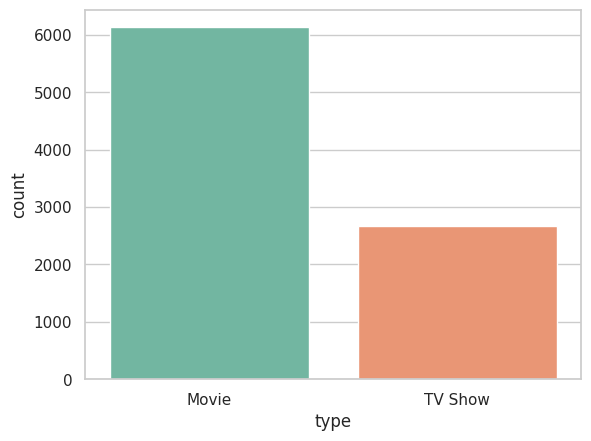

In [14]:
sns.set(style="whitegrid")
ax = sns.countplot(x="type", data=netflix_data, palette="Set2")


<h><font color="b81414">**Observaciones** 📋</font><br>
Es evidente que hay más películas en Netflix que programas de televisión.

## Actualización de contenido de Netflix

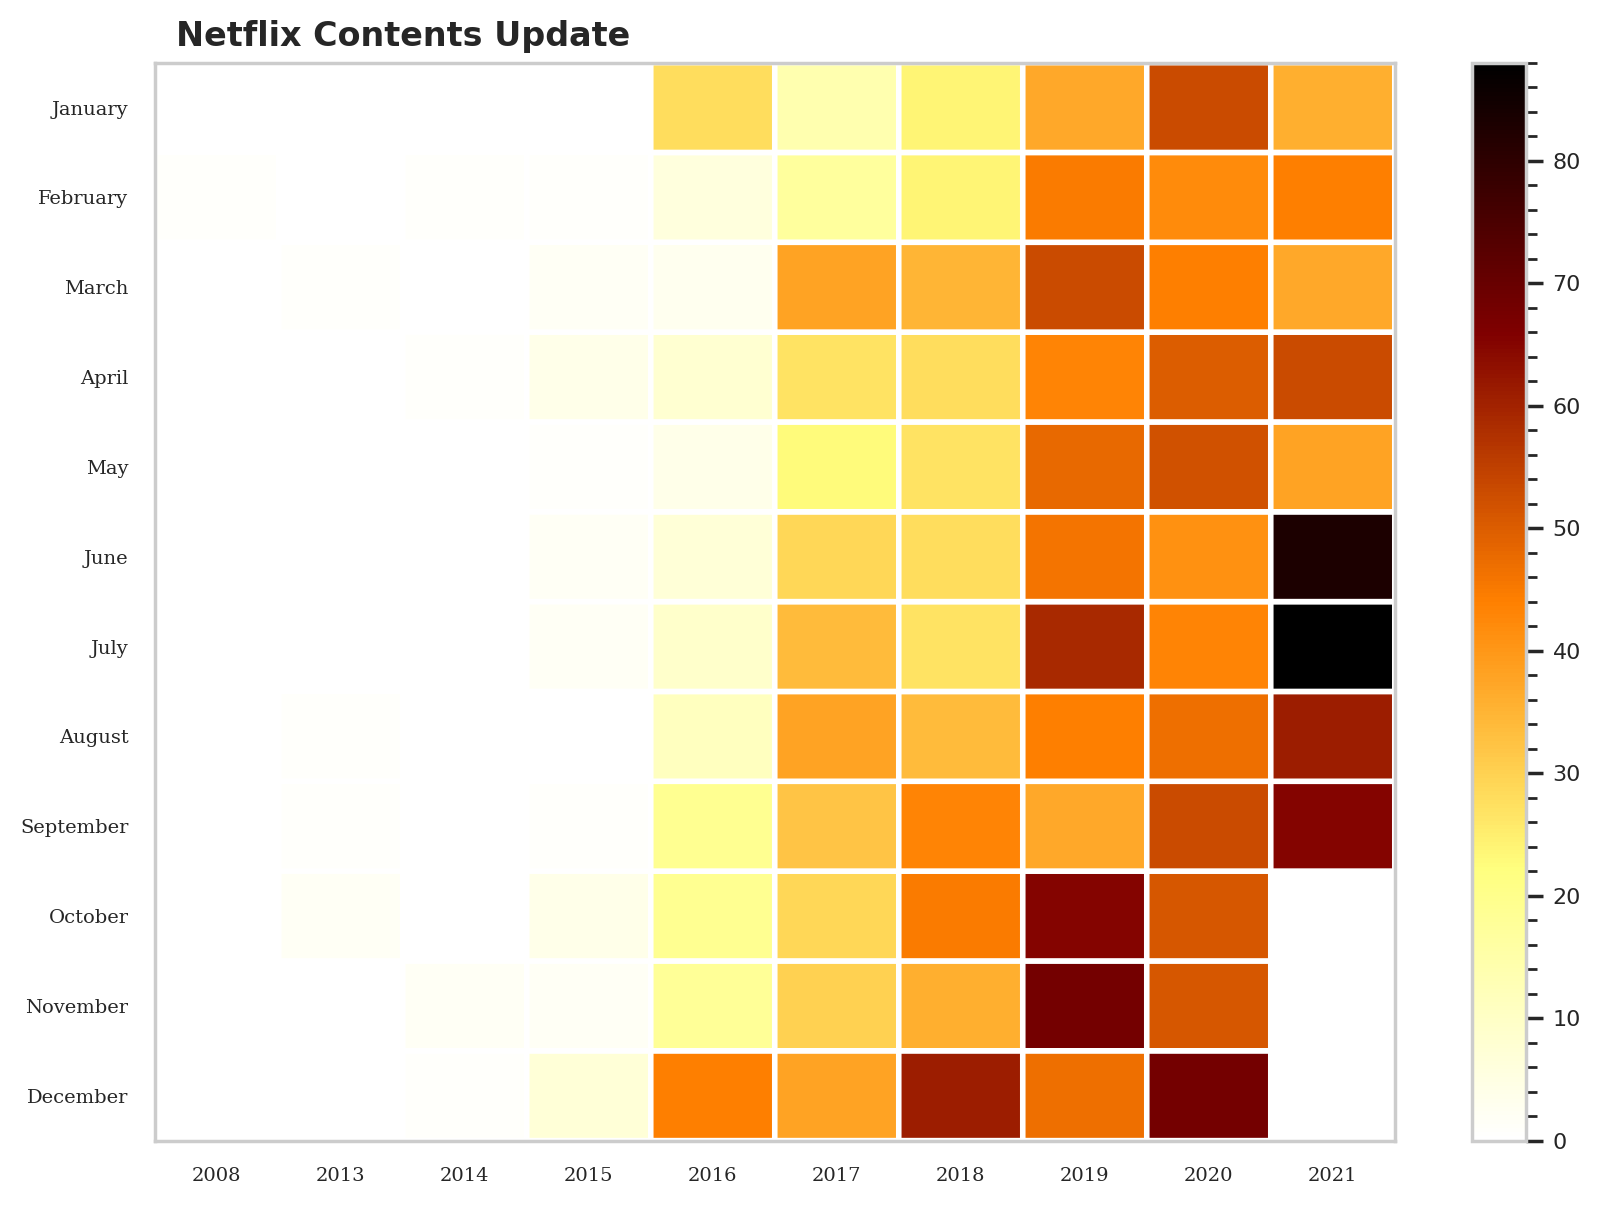

In [15]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

<font color="b81414">**Observaciones**</font>📋 <br>
Desde el 2018 se puede ver un incremento notable en el contenido de Netflix

## Análisis de calificaciones de películas

<ipython-input-18-6441c0d408e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])


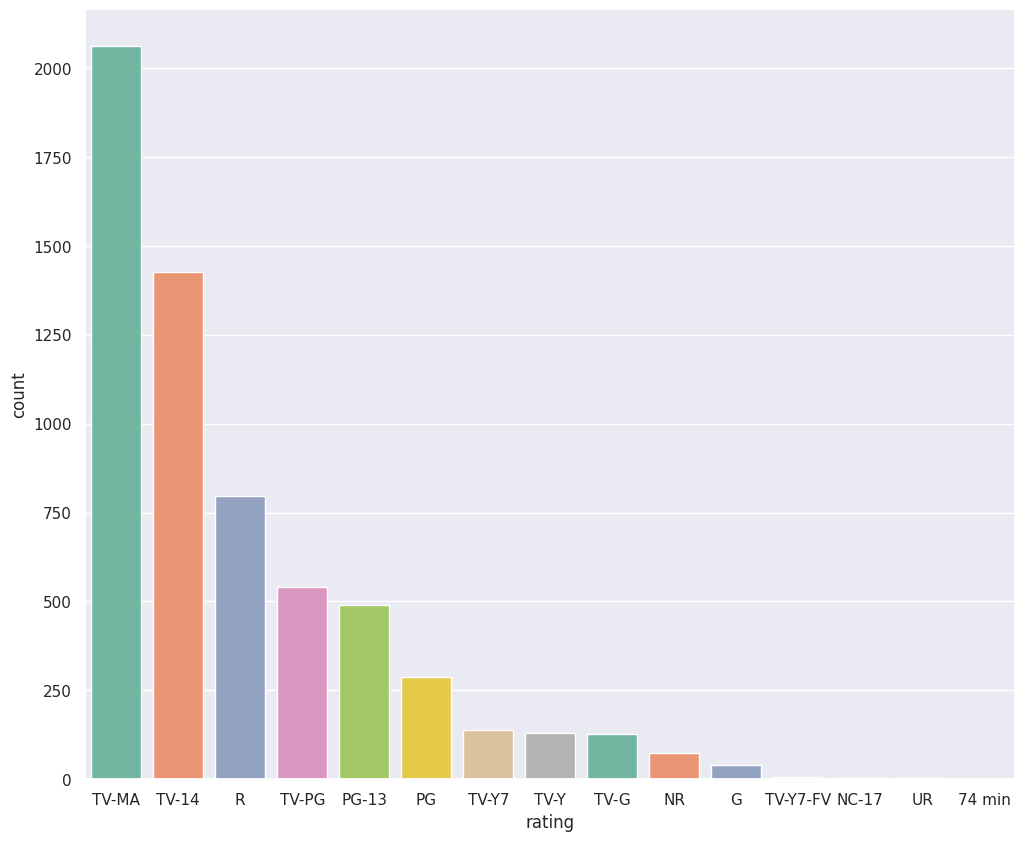

In [18]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])


<font color="b81414">**Observaciones**</font>📋
* El mayor número de películas tiene la calificación "TV-MA", asignada por las Directrices de Televisión para Padres a los programas de televisión destinados exclusivamente a un público adulto.
* La segunda en importancia es "TV-14", que indica que el contenido puede ser inapropiado para niños menores de 14 años.
* La tercera en importancia es la muy popular calificación "R". Una película con calificación "R" es una película que la Motion Picture Association of America (MPAA) ha considerado que contiene material que puede ser inapropiado para menores de 17 años;








## Análisis anual de estrenos

<ipython-input-19-00257fe57256>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])


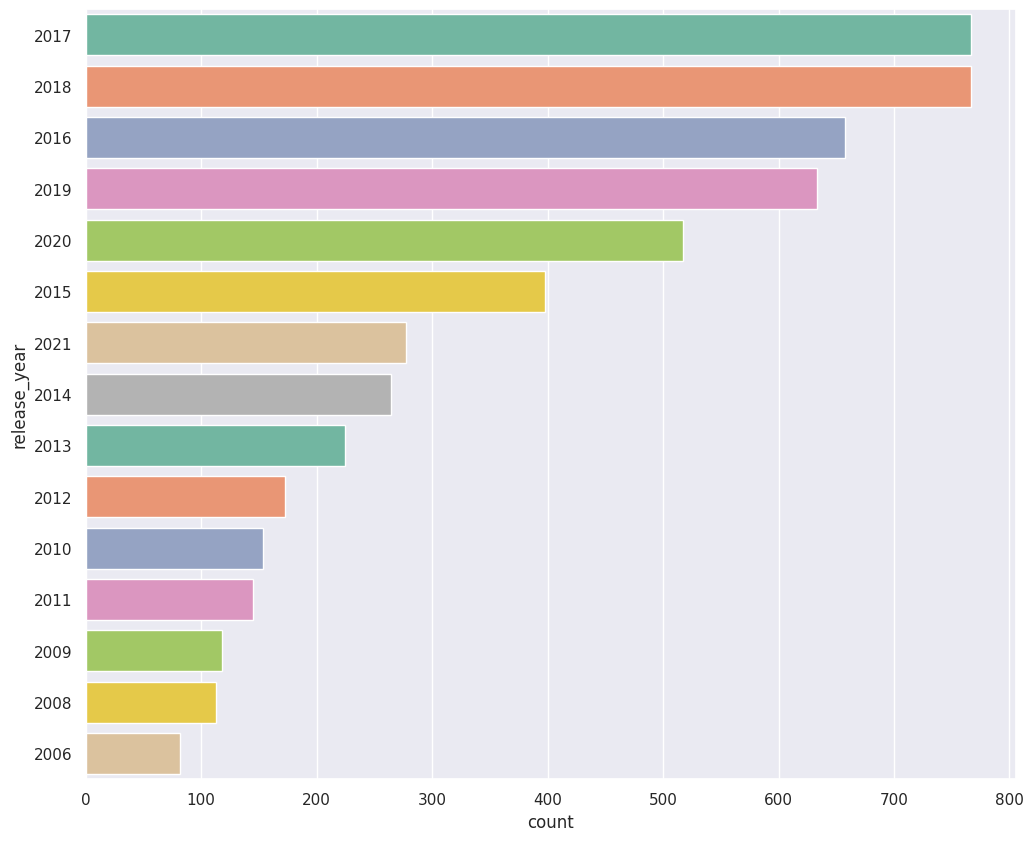

In [19]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

<font color="b81414">**Observaciones**</font>📋 <br>
Se puede observar que en el año 2017 fue el año en el que se estrenaron la mayoría de las películas.

# Análisis de duración de películas

In [22]:
netflix_movies['duration']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6131, dtype: object

In [23]:
#Cambiamos el tipo de dato de la columna duration de object a float
netflix_movies['duration'] = pd.to_numeric(netflix_movies['duration'])

<ipython-input-23-c37bbb6578e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration'] = pd.to_numeric(netflix_movies['duration'])


In [24]:
netflix_movies['duration'].dtype

dtype('float64')

<ipython-input-25-7ac85c43151c>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=netflix_movies['duration'], shade=True)


<Axes: xlabel='duration', ylabel='Density'>

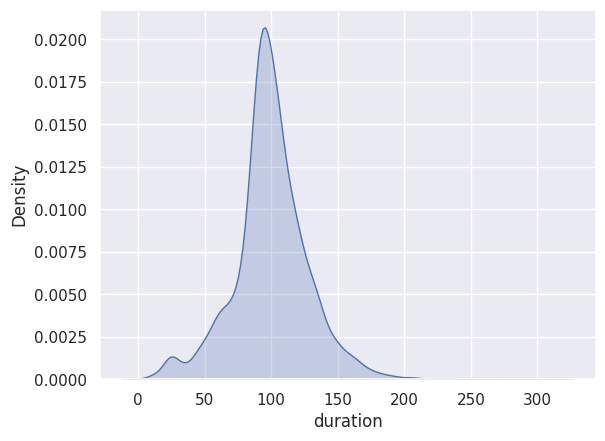

In [25]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

<font color="#FF0000">**Observaciones**</font>📋 <br>
Una buena cantidad de películas en Netflix tienen una duración de entre **75** y **120** minutos. <br> Es aceptable considerando el hecho de que una buena parte de la audiencia no puede ver una película de 3 horas de una sola vez.

# Cuales son los generos que mas se encuentran en Netflix

<ipython-input-28-a59bcb7041a3>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Numero de Peliculas", y="Genero", data=df_top, palette="Set2")


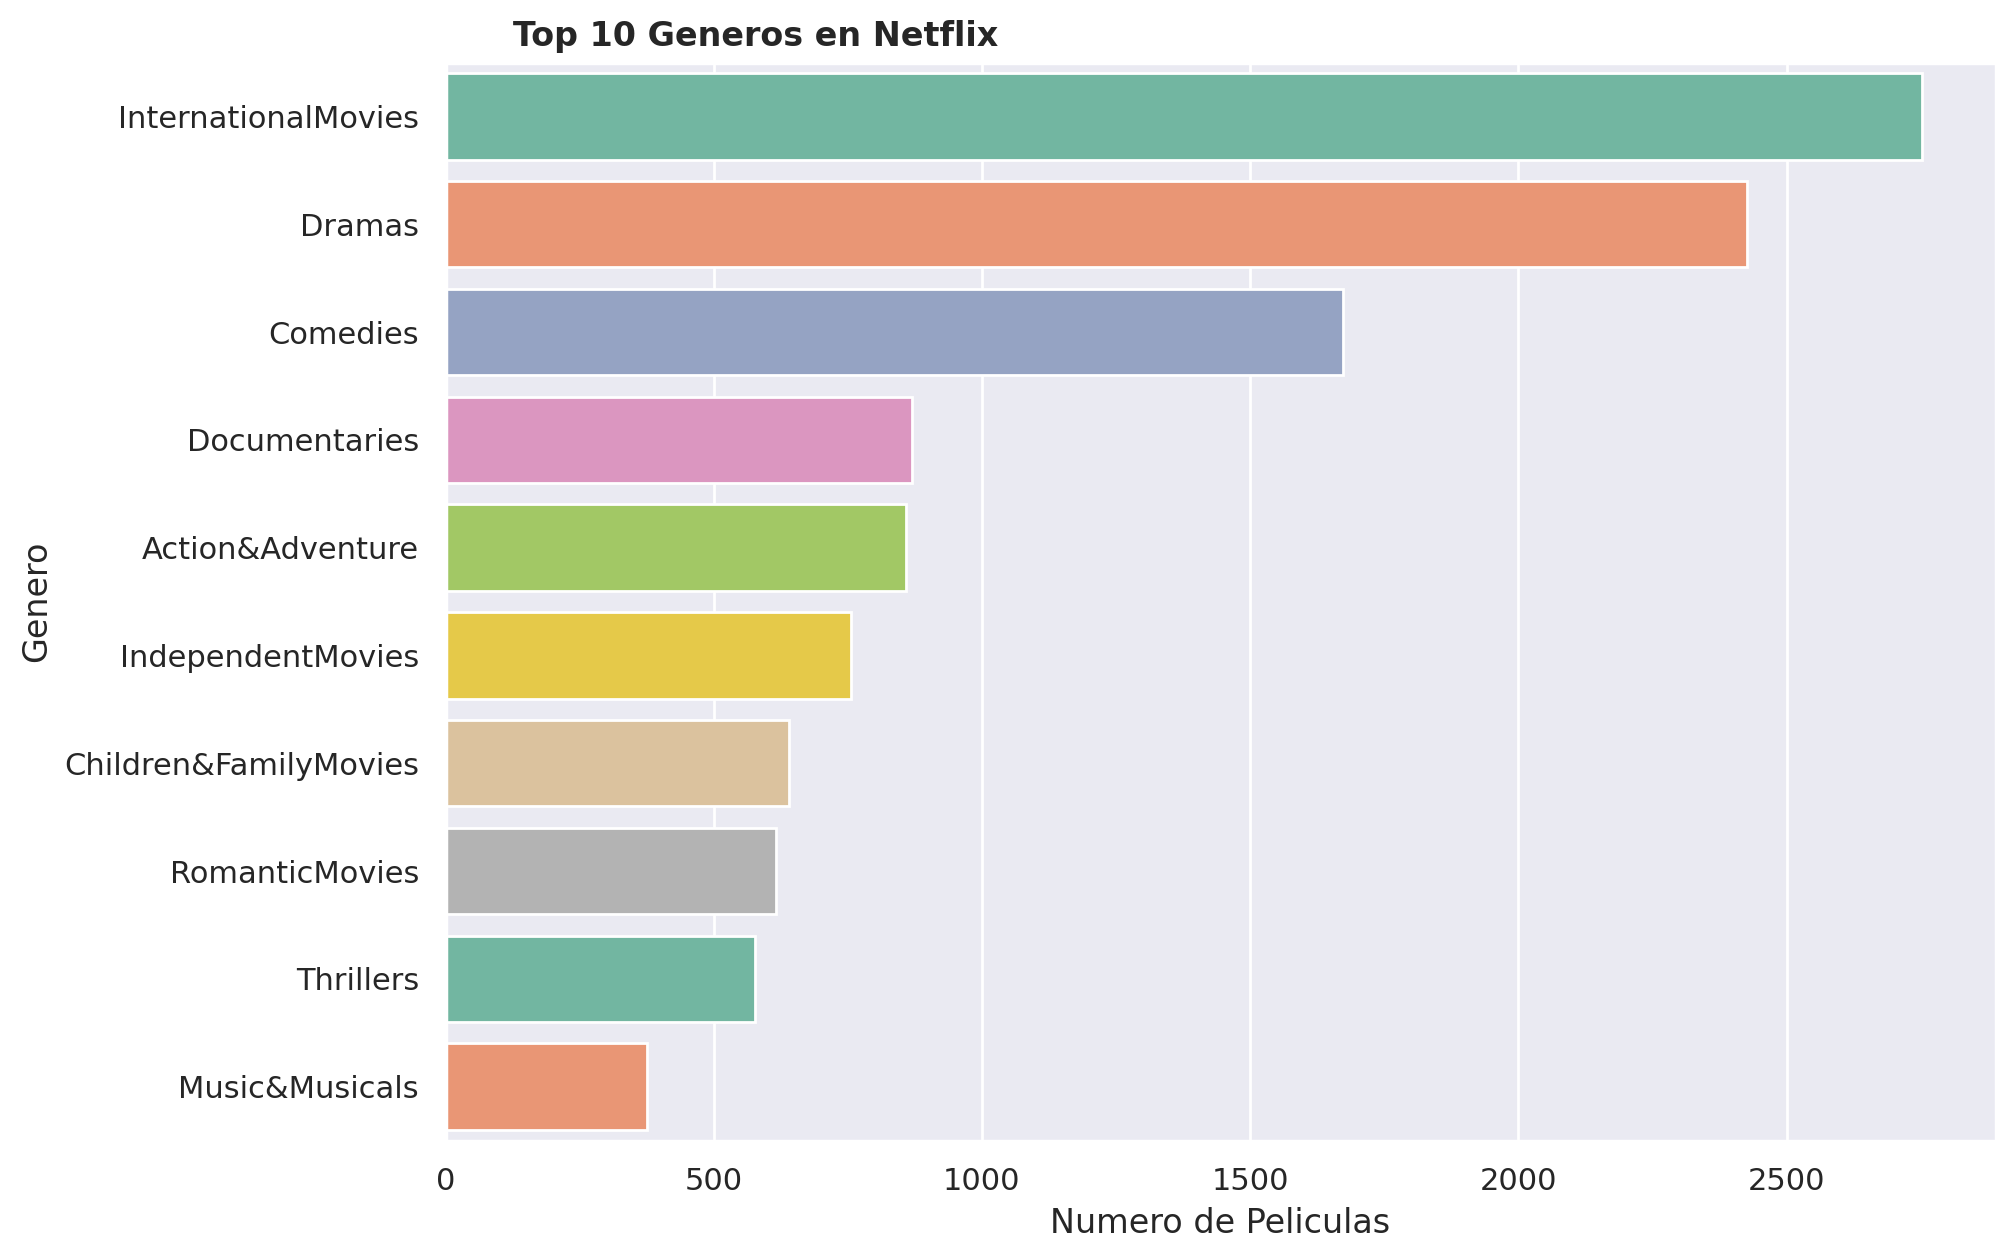

In [28]:
g = dict(g)
df = pd.DataFrame(g.items(), columns=['Genero', 'Numero de Peliculas'])
df = df.sort_values(by='Numero de Peliculas', ascending=False)
df.reset_index(drop=True, inplace=True)
df_top = df.head(10)
plt.figure(figsize=(10, 7), dpi=200)
sns.set(style="darkgrid")
ax = sns.barplot(x="Numero de Peliculas", y="Genero", data=df_top, palette="Set2")
plt.title('Top 10 Generos en Netflix', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
plt.show()


<font color="b81414">**Observaciones**</font>📋 <br>
Podemos ver que los generos de peliculas que mas se encuentran en Netflix son películas internacionales, dramas y comedias  


# ¿Cuáles son los países que producen la mayor cantidad de contenido?

<ipython-input-31-3199da8c8622>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='Set2')


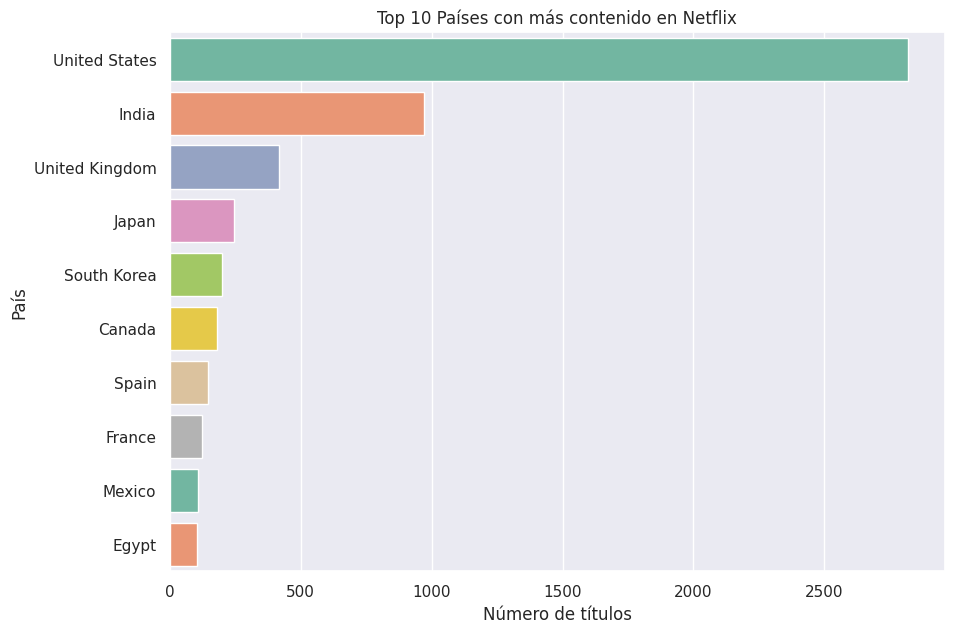

In [31]:
# Agrupa los datos por país y cuenta el número de títulos
country_counts = netflix_data.groupby('country')['title'].count().sort_values(ascending=False)

# Selecciona los 10 países con más títulos
top_10_countries = country_counts.head(10)

# Crea un diagrama de barras
plt.figure(figsize=(10, 7))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='Set2')

# Añade título y etiquetas
plt.title('Top 10 Países con más contenido en Netflix')
plt.xlabel('Número de títulos')
plt.ylabel('País')

# Muestra el diagrama
plt.show()


<font color="b81414">**Observaciones**</font>📋 <br>
Podemos observar que el pais que mas genera contenido en netflix son los Estados Unidos

# **Conclusiones**

- Netflix tiene una amplia variedad de contenido disponible, incluyendo películas, programas de televisión, documentales y especiales.
- La mayoría del contenido en Netflix es películas.
- El contenido de Netflix se actualiza constantemente con nuevos títulos añadidos cada mes.
- Las películas en Netflix tienen una duración media de entre 75 y 120 minutos.
- Los géneros más populares en Netflix son películas internacionales, dramas y comedias.
- Estados Unidos es el país que produce la mayor cantidad de contenido para Netflix.